In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'combined_a_z_2.csv'
model_save_path = 'keypoint_classifier.hdf5'
tflite_save_path = 'keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = pd.read_csv(dataset, header=None)

In [5]:
X = X_dataset.iloc[:, 1:].copy()

In [6]:
y = X_dataset.iloc[:, 0].copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
76/87 [=========================>....] - ETA: 0s - loss: 3.1759 - accuracy: 0.0964
Epoch 1: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 1s 4ms/step - loss: 3.1649 - accuracy: 0.0994 - val_loss: 2.9881 - val_accuracy: 0.2466
Epoch 2/1000
86/87 [============================>.] - ETA: 0s - loss: 2.8607 - accuracy: 0.1709
Epoch 2: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 2.8611 - accuracy: 0.1707 - val_loss: 2.4865 - val_accuracy: 0.2447
Epoch 3/1000
87/87 [==============================] - ETA: 0s - loss: 2.4837 - accuracy: 0.2236
Epoch 3: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 2.4837 - accuracy: 0.2236 - val_loss: 2.0463 - val_accuracy: 0.4171
Epoch 4/1000
86/87 [============================>.] - ETA: 0s - loss: 2.1930 - accuracy: 0.2894
Epoch 4: saving model to keypoint_classifier.hdf5
87/87 [======================

Epoch 31/1000
45/87 [==============>...............] - ETA: 0s - loss: 1.2031 - accuracy: 0.5814
Epoch 31: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 1.1991 - accuracy: 0.5869 - val_loss: 0.5712 - val_accuracy: 0.9396
Epoch 32/1000
46/87 [==============>...............] - ETA: 0s - loss: 1.1881 - accuracy: 0.5797
Epoch 32: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 1.1762 - accuracy: 0.5867 - val_loss: 0.5502 - val_accuracy: 0.9464
Epoch 33/1000
45/87 [==============>...............] - ETA: 0s - loss: 1.1670 - accuracy: 0.5960
Epoch 33: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 1.1736 - accuracy: 0.5936 - val_loss: 0.5519 - val_accuracy: 0.9489
Epoch 34/1000
46/87 [==============>...............] - ETA: 0s - loss: 1.1410 - accuracy: 0.6043
Epoch 34: saving model to keypoint_classifier.hdf5
87/87 [==============

Epoch 61/1000
45/87 [==============>...............] - ETA: 0s - loss: 1.0146 - accuracy: 0.6627
Epoch 61: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 1.0281 - accuracy: 0.6520 - val_loss: 0.3969 - val_accuracy: 0.9709
Epoch 62/1000
44/87 [==============>...............] - ETA: 0s - loss: 1.0209 - accuracy: 0.6442
Epoch 62: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.6453 - val_loss: 0.3933 - val_accuracy: 0.9709
Epoch 63/1000
86/87 [============================>.] - ETA: 0s - loss: 1.0329 - accuracy: 0.6434
Epoch 63: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 1.0333 - accuracy: 0.6434 - val_loss: 0.4054 - val_accuracy: 0.9698
Epoch 64/1000
46/87 [==============>...............] - ETA: 0s - loss: 1.0200 - accuracy: 0.6461
Epoch 64: saving model to keypoint_classifier.hdf5
87/87 [==============

Epoch 91/1000
45/87 [==============>...............] - ETA: 0s - loss: 0.9345 - accuracy: 0.6743
Epoch 91: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.9553 - accuracy: 0.6698 - val_loss: 0.3349 - val_accuracy: 0.9744
Epoch 92/1000
46/87 [==============>...............] - ETA: 0s - loss: 0.9424 - accuracy: 0.6756
Epoch 92: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.9506 - accuracy: 0.6721 - val_loss: 0.3326 - val_accuracy: 0.9753
Epoch 93/1000
49/87 [===============>..............] - ETA: 0s - loss: 0.9625 - accuracy: 0.6712
Epoch 93: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.9482 - accuracy: 0.6774 - val_loss: 0.3304 - val_accuracy: 0.9766
Epoch 94/1000
46/87 [==============>...............] - ETA: 0s - loss: 0.9832 - accuracy: 0.6564
Epoch 94: saving model to keypoint_classifier.hdf5
87/87 [==============

87/87 [==============================] - 0s 2ms/step - loss: 0.9015 - accuracy: 0.6896 - val_loss: 0.2973 - val_accuracy: 0.9780
Epoch 121/1000
44/87 [==============>...............] - ETA: 0s - loss: 0.9164 - accuracy: 0.6875
Epoch 121: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.9196 - accuracy: 0.6876 - val_loss: 0.2958 - val_accuracy: 0.9793
Epoch 122/1000
43/87 [=============>................] - ETA: 0s - loss: 0.8996 - accuracy: 0.6988
Epoch 122: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8985 - accuracy: 0.6940 - val_loss: 0.2986 - val_accuracy: 0.9755
Epoch 123/1000
85/87 [============================>.] - ETA: 0s - loss: 0.9157 - accuracy: 0.6863
Epoch 123: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.9154 - accuracy: 0.6868 - val_loss: 0.3002 - val_accuracy: 0.9731
Epoch 124/1000
85/87 [============

Epoch 150/1000
45/87 [==============>...............] - ETA: 0s - loss: 0.8831 - accuracy: 0.6997
Epoch 150: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.6986 - val_loss: 0.2839 - val_accuracy: 0.9777
Epoch 151/1000
45/87 [==============>...............] - ETA: 0s - loss: 0.8977 - accuracy: 0.6950
Epoch 151: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.6987 - val_loss: 0.2808 - val_accuracy: 0.9772
Epoch 152/1000
87/87 [==============================] - ETA: 0s - loss: 0.8563 - accuracy: 0.7100
Epoch 152: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.7100 - val_loss: 0.2692 - val_accuracy: 0.9802
Epoch 153/1000
46/87 [==============>...............] - ETA: 0s - loss: 0.8628 - accuracy: 0.7074
Epoch 153: saving model to keypoint_classifier.hdf5
87/87 [======

87/87 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.7072 - val_loss: 0.2692 - val_accuracy: 0.9774
Epoch 180/1000
45/87 [==============>...............] - ETA: 0s - loss: 0.8603 - accuracy: 0.6988
Epoch 180: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.7039 - val_loss: 0.2605 - val_accuracy: 0.9782
Epoch 181/1000
44/87 [==============>...............] - ETA: 0s - loss: 0.8596 - accuracy: 0.7065
Epoch 181: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.7076 - val_loss: 0.2552 - val_accuracy: 0.9799
Epoch 182/1000
75/87 [========================>.....] - ETA: 0s - loss: 0.8610 - accuracy: 0.7089
Epoch 182: saving model to keypoint_classifier.hdf5
87/87 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.7103 - val_loss: 0.2597 - val_accuracy: 0.9793
Epoch 183/1000
73/87 [============

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

29/29 [==============================] - 0s 962us/step - loss: 0.2636 - accuracy: 0.9772


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 66ms/step
[1.9767064e-04 1.0076204e-02 4.4775844e-04 1.1921099e-03 1.5202322e-03
 8.5087772e-04 1.9102664e-04 1.3647204e-04 6.9196091e-04 2.7844144e-04
 1.0603548e-01 1.3680836e-04 6.5179733e-03 4.8172278e-03 2.5684101e-04
 2.1774886e-05 6.4637720e-06 9.6252836e-02 1.9268029e-03 5.0078821e-04
 6.0713214e-01 1.2446526e-01 2.7345931e-02 7.2622178e-03 1.6646860e-05
 1.7220656e-03]
20


# Confusion matrix

115/115 [==============================] - 0s 682us/step


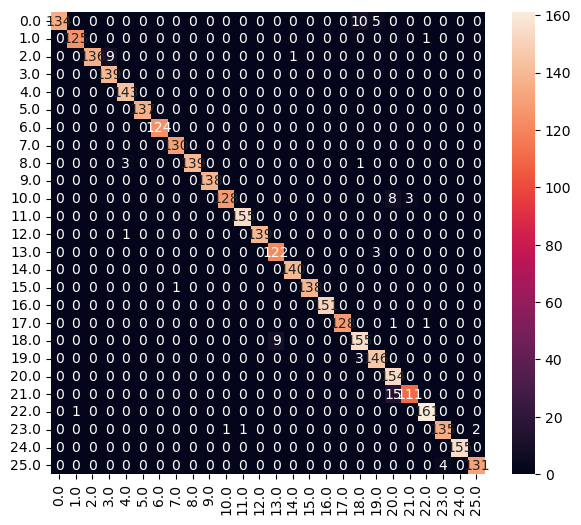

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       149
         1.0       0.99      0.99      0.99       126
         2.0       1.00      0.93      0.96       146
         3.0       0.94      1.00      0.97       139
         4.0       0.97      1.00      0.99       143
         5.0       1.00      1.00      1.00       137
         6.0       1.00      1.00      1.00       124
         7.0       0.99      1.00      1.00       130
         8.0       1.00      0.97      0.99       143
         9.0       1.00      1.00      1.00       138
        10.0       0.99      0.92      0.96       139
        11.0       0.99      1.00      1.00       155
        12.0       1.00      0.99      1.00       140
        13.0       0.93      0.98      0.95       125
        14.0       0.99      1.00      1.00       140
        15.0       1.00      0.99      1.00       139
        16.0       1.00      1.00      1.00       151
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\anton\AppData\Local\Temp\tmpr5n_m4jm\assets


INFO:tensorflow:Assets written to: C:\Users\anton\AppData\Local\Temp\tmpr5n_m4jm\assets


7512

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

ValueError: Cannot set tensor: Got value of type FLOAT64 but expected type FLOAT32 for input 0, name: serving_default_input_1:0 

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))